In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
l0 = Dense(units=1, input_shape=[1])
model = Sequential([l0])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

print(model.predict([10.0]))
print("Here is what I learned: {}".format(l0.get_weights()))

Epoch 1/500
1/1 [==============================] - 0s 408ms/step - loss: 5.3040
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 4.3502
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 3.5961
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 2.9993
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 2.5262
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 2.1507
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1.8518
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 1.6134
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 1.4226
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 1.2694
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 1.1457
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0454
Epoch 13/500
1/1 [==============================] - 0s 3ms

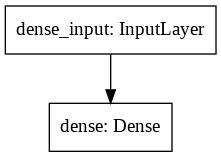

In [5]:
tf.keras.utils.plot_model(model)

In [6]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [7]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [8]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

896

In [9]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

[{'name': 'serving_default_dense_input:0', 'index': 0, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 3, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [10]:
to_predict = np.array([[10.0]], dtype=np.float32)
print(to_predict)
interpreter.set_tensor(input_details[0]['index'], to_predict)
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(tflite_results)

[[10.]]
[[18.984222]]
